In [46]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pylab as py
import os
import statsmodels.api as sm
import yfinance as yf

In [47]:
from pandas import to_datetime
import pandas as pd

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
from pandas_datareader import data as pdr
yf.pdr_override()

In [50]:
data = pdr.get_data_yahoo("TSLA", start="2019-04-08", end="2021-04-08")
data.reset_index(inplace=True,drop=False)
print(data['Adj Close'].iloc[-1])

[*********************100%***********************]  1 of 1 completed
223.6566619873047


In [51]:
def splitPeriod(data, period):
    if period == 'Day':
        price = data
    elif period == 'Week':
        data['Day'] = (to_datetime(data['Date'])).dt.day_name()
        price = data.loc[data['Day'] == 'Monday']
    else:
        price = data.groupby(pd.DatetimeIndex(data['Date']).to_period('M')).nth(0)
    return price

In [52]:
def plotPrices(data, period):

    price = splitPeriod(data, period)
    
    X = np.arange(len(price))
    Y = np.array(price['Close'])
    
    plt.xlabel("Time")
    plt.ylabel("Index Value")
    plt.plot(X, Y, label=period)
    plt.legend()

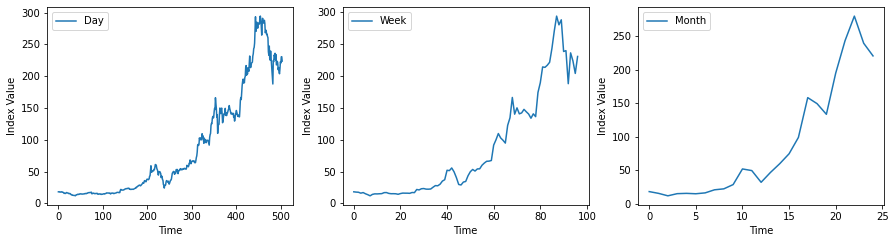

In [53]:
f=1
periodicity = ['Day', 'Week', 'Month']
ax = plt.figure(f, figsize=(15.0, 8.0))
for i in range(len(periodicity)):
    plt.subplot(2, len(periodicity), i+1)
    plotPrices(data, periodicity[i])
ax.savefig('./content/Plots/'+'_1.png')
ax.show()

In [56]:
def model(data, period):

    price = splitPeriod(data, period)
    
    ret = np.array(((price['Adj Close']-price['Adj Close'].shift(-1))/price['Adj Close'].shift(-1)).dropna())
    bins = 50
    mu = np.mean(ret)
    sigma = np.std(ret)
    norm_ret = (ret - mu)/sigma

    log_ret = np.log(1 + ret)
    mean_log_ret = np.mean(log_ret)
    std_dev_log_ret = np.std(log_ret)
    norm_log_ret = (log_ret - mean_log_ret)/std_dev_log_ret
    plt.subplot(2, 2, 1)

    #plt.title(market.upper()+" Stock Data "+stock+" Period="+str(period))
    plt.title("Period: " + str(period))
    plt.xlabel("Normalised Log Return")
    plt.ylabel("Frequency")

    plt.hist(norm_log_ret, bins=bins, color='orange', edgecolor='black', linewidth=0.3, density=True)

    muNorm, sigNorm = 0, 1

    X = np.linspace(min(norm_log_ret), max(norm_log_ret), len(norm_log_ret))
    Y = (1/(2*np.pi*(sigNorm**2))**0.5)*np.exp(-0.5*(X-muNorm)**2/(sigNorm)**2)
    plt.plot(X, Y, color='blue', label = "Standard Normal")
    plt.legend()
    
    plt.subplot(2,2, 2)
    plt.title("Period: " + str(period))
    plt.ylabel("Normalised Log Return")
    plt.boxplot(norm_ret)
    sm.qqplot(norm_ret, line ='45')
    
    plt.show()

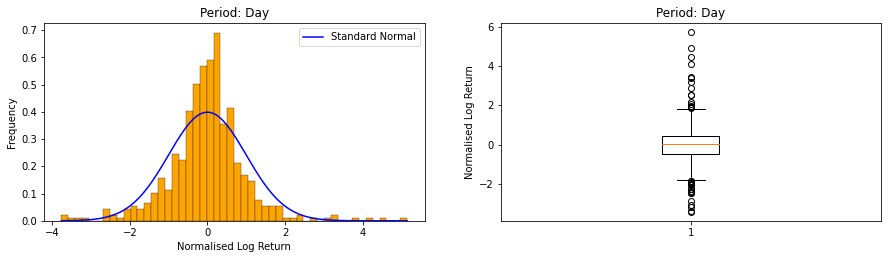

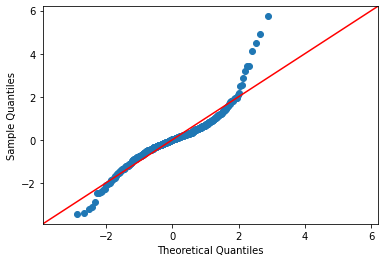

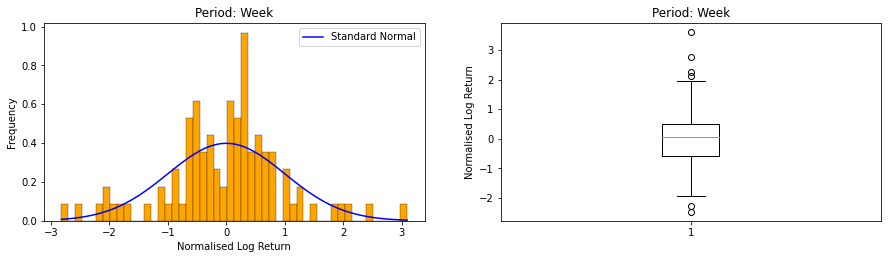

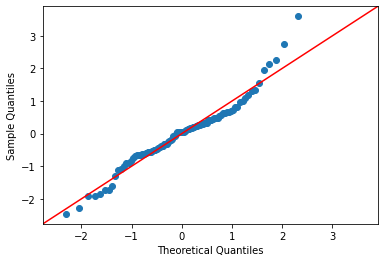

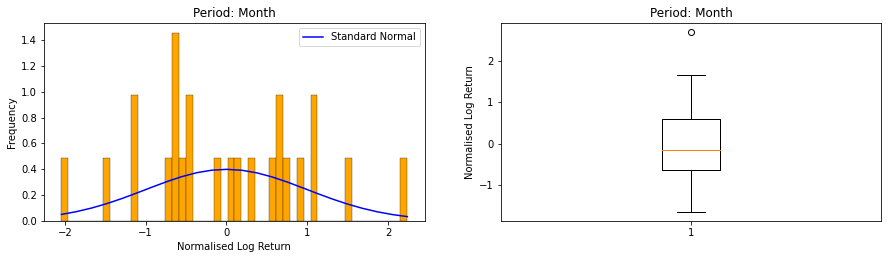

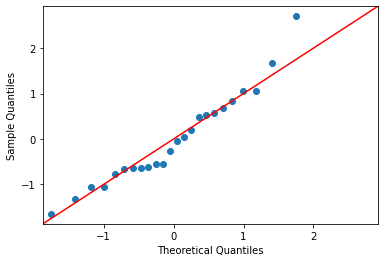

In [57]:
f=1
ax = plt.figure(f, figsize=(15.0, 8.0))
for i in range(len(periodicity)):
    ax = plt.figure(f, figsize=(15.0, 8.0))
    model(data, periodicity[i])
ax.savefig('./content/Plots/'+'_2.png')
ax.show()